In [1]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-vlotvttx
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-vlotvttx
  Created wheel for albumentations: filename=albumentations-1.0.2-cp37-none-any.whl size=98521 sha256=89ff2c53d4360c2a17f42ec33939b08ff24c2ae8dc1d3aabdcc77f7cf245d565
  Stored in directory: /tmp/pip-ephem-wheel-cache-86zqmgfp/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
import os
import cv2
import random
import pandas as pd
import numpy as np
from tqdm import tqdm
import albumentations as A
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from typing import Tuple, List, Sequence, Callable

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as tfms
from torch.utils.data import DataLoader, Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp /content/drive/MyDrive/cow.jpg ./cow.jpg

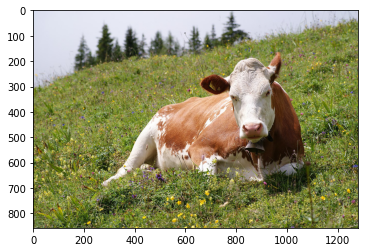

In [32]:
from PIL import Image
image = "/content/cow.jpg"
image = Image.open(image)

plt.imshow(image)
plt.show()

In [33]:
class Transforms:
    def __init__(self, transforms: A.Compose):
        self.transforms = transforms

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))

class MotionBlurTrans():
    def __init__(self):
        self.transforms = A.MotionBlur(p=1.0, blur_limit=15)

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))

class GaussNoiseTrans():
    def __init__(self):
        self.transforms = A.GaussNoise(p=0.5)

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))

class HueSaturationTrans():
    def __init__(self):
        self.transforms = A.HueSaturationValue(p=1.0)

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))


class RgbShiftTrans():
    def __init__(self):
        self.transforms = A.RGBShift(p=1.0)

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))    

motion_blur_trans = MotionBlurTrans()
gauss_noise_trans = GaussNoiseTrans()
hue_saturation_trans = HueSaturationTrans()
rgb_shift_trans = RgbShiftTrans()

In [48]:
image_mot_blur = motion_blur_trans(img = image)['image']
image_gauss_noise = gauss_noise_trans(img = image)['image']
image_hue_sat = hue_saturation_trans(img = image)['image']
image_rgb_shift = rgb_shift_trans(img = image)['image']

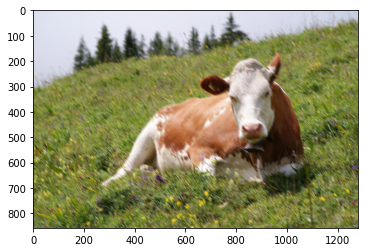

In [47]:
plt.imshow(image_mot_blur)
plt.show()

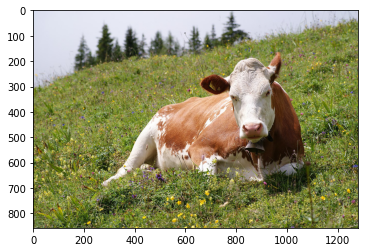

In [49]:
plt.imshow(image_gauss_noise)
plt.show()

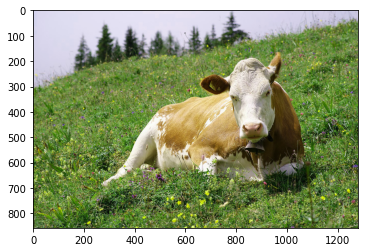

In [50]:
plt.imshow(image_hue_sat)
plt.show()

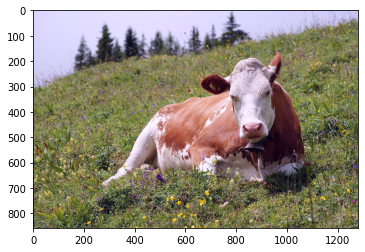

In [51]:
plt.imshow(image_rgb_shift)
plt.show()